In [1]:
# importing libraries
import pandas as pd
from sodapy import Socrata
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker


# Getting all the data

In [2]:
client = Socrata("data.ny.gov", None)

In [3]:
results = client.get("yg77-3tkj", limit=260000)

In [4]:
# Convert to pandas DataFrame
results_df = pd.DataFrame.from_records(results)

In [5]:
results_df.head()

,fiscal_year,month,scenario,financial_plan_year,expense_type,agency,type,subtype,general_ledger,amount
0,2024,2024-04-01T00:00:00.000,Actual,2024,NREIMB,CD,Total Expenses Before Non-Cash Liability Adjs.,Non-Labor Expenses,Other Business Expenses,3944.81
1,2024,2024-04-01T00:00:00.000,Actual,2024,REIMB,MTABC,Total Revenue,NaN,Capital and Other Reimbursements,103737.22
2,2024,2024-04-01T00:00:00.000,Actual,2024,REIMB,MNR,Total Expenses Before Non-Cash Liability Adjs.,Labor Expenses,Overtime,1866737.82
3,2024,2024-04-01T00:00:00.000,Actual,2024,NREIMB,MTABC,Non-Cash Liabilities,NaN,Environmental Remediation,0.0
4,2024,2024-04-01T00:00:00.000,Actual,2024,REIMB,BT,Total Expenses Before Non-Cash Liability Adjs.,Labor Expenses,Health and Welfare,701601.75


In [6]:
# checking rows
total_rows = len(results_df)
print(total_rows)

260000


In [7]:
# Checking data types
print(results_df.dtypes)

fiscal_year            object
month                  object
scenario               object
financial_plan_year    object
expense_type           object
agency                 object
type                   object
subtype                object
general_ledger         object
amount                 object
dtype: object


In [9]:
# Converting data types
results_df['fiscal_year'] = results_df['fiscal_year'].astype(int)
results_df['financial_plan_year'] = results_df['financial_plan_year'].astype(int)
# Convert month to datetime
results_df['month'] = pd.to_datetime(results_df['month'])

# Convert amount to float (since it might contain decimals)
results_df['amount'] = results_df['amount'].astype(float)

In [10]:
# The rest of the fields are categorical/text data
results_df['scenario'] = results_df['scenario'].astype('category')
results_df['expense_type'] = results_df['expense_type'].astype('category')
results_df['agency'] = results_df['agency'].astype('category')
results_df['type'] = results_df['type'].astype('category')
results_df['subtype'] = results_df['subtype'].astype('category')
results_df['general_ledger'] = results_df['general_ledger'].astype('category')

In [11]:
print(results_df.dtypes)

fiscal_year                     int64
month                  datetime64[ns]
scenario                     category
financial_plan_year             int64
expense_type                 category
agency                       category
type                         category
subtype                      category
general_ledger               category
amount                        float64
dtype: object


In [12]:
results_df.head()

,fiscal_year,month,scenario,financial_plan_year,expense_type,agency,type,subtype,general_ledger,amount
0,2024,2024-04-01,Actual,2024,NREIMB,CD,Total Expenses Before Non-Cash Liability Adjs.,Non-Labor Expenses,Other Business Expenses,3944.81
1,2024,2024-04-01,Actual,2024,REIMB,MTABC,Total Revenue,NaN,Capital and Other Reimbursements,103737.22
2,2024,2024-04-01,Actual,2024,REIMB,MNR,Total Expenses Before Non-Cash Liability Adjs.,Labor Expenses,Overtime,1866737.82
3,2024,2024-04-01,Actual,2024,NREIMB,MTABC,Non-Cash Liabilities,NaN,Environmental Remediation,0.00
4,2024,2024-04-01,Actual,2024,REIMB,BT,Total Expenses Before Non-Cash Liability Adjs.,Labor Expenses,Health and Welfare,701601.75


In [13]:
# Adding a new column
# Define a function to map months to seasons
def month_to_season(month):
    month = pd.to_datetime(month).month
    if month in (3, 4, 5):
        return 'Spring'
    elif month in (6, 7, 8):
        return 'Summer'
    elif month in (9, 10, 11):
        return 'Fall'
    else:
        return 'Winter'

In [14]:
# Applying the function to create a new 'Season' column
results_df['Season'] = results_df['month'].apply(month_to_season)
results_df.head()

,fiscal_year,month,scenario,financial_plan_year,expense_type,agency,type,subtype,general_ledger,amount,Season
0,2024,2024-04-01,Actual,2024,NREIMB,CD,Total Expenses Before Non-Cash Liability Adjs.,Non-Labor Expenses,Other Business Expenses,3944.81,Spring
1,2024,2024-04-01,Actual,2024,REIMB,MTABC,Total Revenue,NaN,Capital and Other Reimbursements,103737.22,Spring
2,2024,2024-04-01,Actual,2024,REIMB,MNR,Total Expenses Before Non-Cash Liability Adjs.,Labor Expenses,Overtime,1866737.82,Spring
3,2024,2024-04-01,Actual,2024,NREIMB,MTABC,Non-Cash Liabilities,NaN,Environmental Remediation,0.00,Spring
4,2024,2024-04-01,Actual,2024,REIMB,BT,Total Expenses Before Non-Cash Liability Adjs.,Labor Expenses,Health and Welfare,701601.75,Spring


# Exploratory Data Analysis (EDA)

## Question 1: Which MTA agencies generate the most revenue?

In [15]:
# Ensure that 'amount' is in the correct data type
results_df['amount'] = pd.to_numeric(results_df['amount'], errors='coerce')

# Filter the data to include only revenue types
revenue_df = results_df[results_df['type'] == 'Total Revenue']

# Group by agency and sum up revenues
agency_revenue = revenue_df.groupby('agency')['amount'].sum().sort_values(ascending=False)

/var/folders/lr/0t04h8qd1v92yszgsq68tr2r0000gn/T/ipykernel_34736/2301280561.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agency_revenue = revenue_df.groupby('agency')['amount'].sum().sort_values(ascending=False)


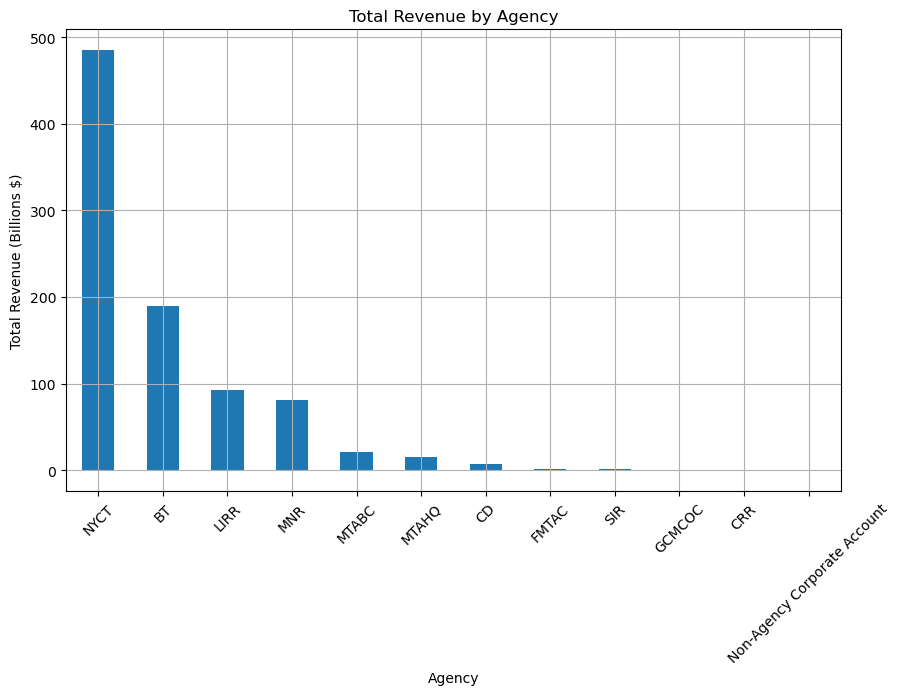

In [17]:
# Visualization
plt.figure(figsize=(10, 6))
agency_revenue.plot(kind='bar')

# Format the y-axis numbers to be more readable
scale = 1e9  # Scale by billions
ticks = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale))
plt.gca().yaxis.set_major_formatter(ticks)

plt.title('Total Revenue by Agency')
plt.xlabel('Agency')
plt.ylabel('Total Revenue (Billions $)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

## Question 2: How do actual expenses and revenues compare to budgeted values across different agencies?

In [18]:
results_df.head()

,fiscal_year,month,scenario,financial_plan_year,expense_type,agency,type,subtype,general_ledger,amount,Season
0,2024,2024-04-01,Actual,2024,NREIMB,CD,Total Expenses Before Non-Cash Liability Adjs.,Non-Labor Expenses,Other Business Expenses,3944.81,Spring
1,2024,2024-04-01,Actual,2024,REIMB,MTABC,Total Revenue,NaN,Capital and Other Reimbursements,103737.22,Spring
2,2024,2024-04-01,Actual,2024,REIMB,MNR,Total Expenses Before Non-Cash Liability Adjs.,Labor Expenses,Overtime,1866737.82,Spring
3,2024,2024-04-01,Actual,2024,NREIMB,MTABC,Non-Cash Liabilities,NaN,Environmental Remediation,0.00,Spring
4,2024,2024-04-01,Actual,2024,REIMB,BT,Total Expenses Before Non-Cash Liability Adjs.,Labor Expenses,Health and Welfare,701601.75,Spring


In [19]:
# Filter relevant scenarios
filtered_df = results_df[(results_df['scenario'] == 'Actual') | (results_df['scenario'].str.contains('Budget'))]

# Pivot data to compare actual and budgeted amounts
pivot_df = filtered_df.pivot_table(index=['agency', 'fiscal_year'], columns='scenario', values='amount', aggfunc='sum')

# Calculate variance as a new column
pivot_df['Variance'] = pivot_df['Actual'] - pivot_df.get('Adopted Budget', 0)  # Adjust column name based on actual budget column name

# Reset index for easier plotting
pivot_df.reset_index(inplace=True)
pivot_df['Inverted Variance'] = pivot_df['Variance'] * -1  # Invert the variance sign

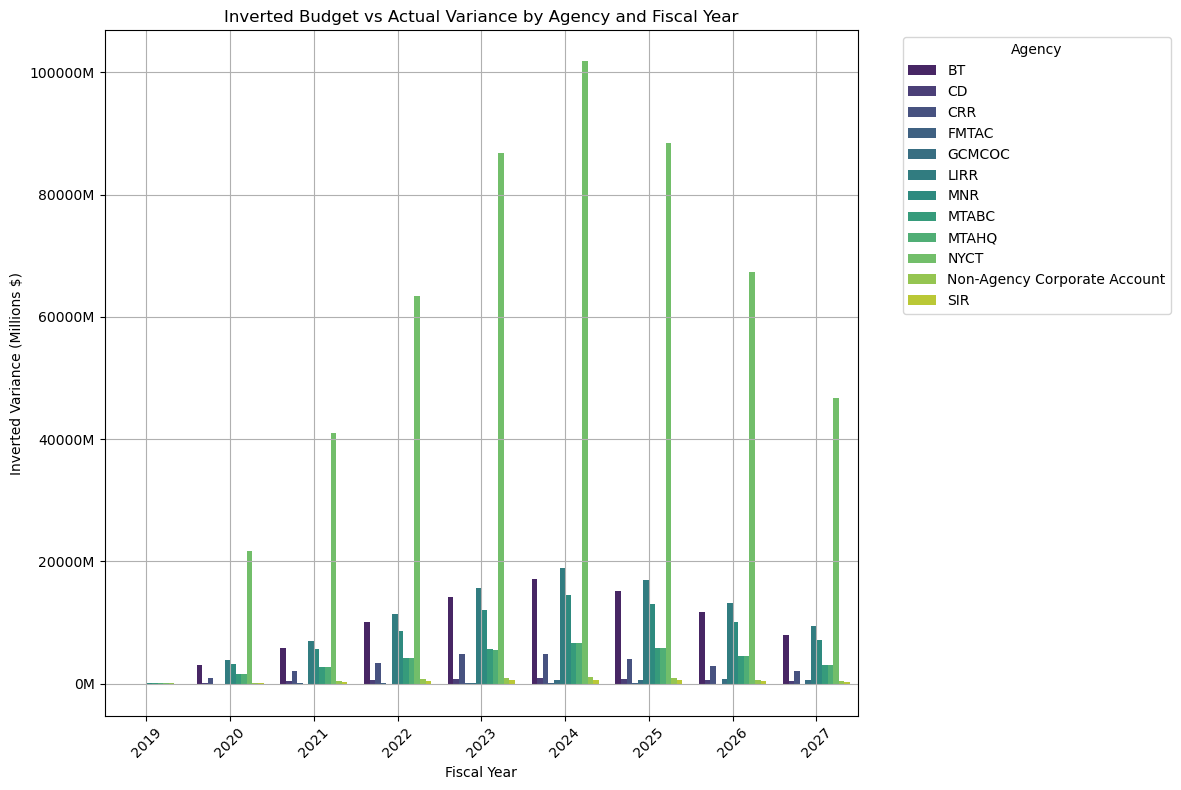

In [20]:
plt.figure(figsize=(12, 8))
ax = sns.barplot(data=pivot_df, x='fiscal_year', y='Inverted Variance', hue='agency', palette='viridis')

# Format the y-axis to display numbers in a more understandable format (e.g., Millions)
scale = 1e6  # Scale by millions
ticks = ticker.FuncFormatter(lambda x, pos: '{0:g}M'.format(x/scale))
ax.yaxis.set_major_formatter(ticks)

plt.title('Inverted Budget vs Actual Variance by Agency and Fiscal Year')
plt.xlabel('Fiscal Year')
plt.ylabel('Inverted Variance (Millions $)')
plt.legend(title='Agency', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

## Questoin 3: What are the major drivers of expenses for the MTA?

In [25]:
results_df.head()

,fiscal_year,month,scenario,financial_plan_year,expense_type,agency,type,subtype,general_ledger,amount,Season
0,2024,2024-04-01,Actual,2024,NREIMB,CD,Total Expenses Before Non-Cash Liability Adjs.,Non-Labor Expenses,Other Business Expenses,3944.81,Spring
1,2024,2024-04-01,Actual,2024,REIMB,MTABC,Total Revenue,NaN,Capital and Other Reimbursements,103737.22,Spring
2,2024,2024-04-01,Actual,2024,REIMB,MNR,Total Expenses Before Non-Cash Liability Adjs.,Labor Expenses,Overtime,1866737.82,Spring
3,2024,2024-04-01,Actual,2024,NREIMB,MTABC,Non-Cash Liabilities,NaN,Environmental Remediation,0.00,Spring
4,2024,2024-04-01,Actual,2024,REIMB,BT,Total Expenses Before Non-Cash Liability Adjs.,Labor Expenses,Health and Welfare,701601.75,Spring


In [26]:
# Ensure that 'amount' is in the correct data type
results_df['amount'] = pd.to_numeric(results_df['amount'], errors='coerce')

# Data Aggregation
# Group by fiscal year, expense type, and subtype, then sum up the amounts
expense_summary = results_df.groupby(['fiscal_year', 'expense_type', 'subtype']).agg({'amount': 'sum'}).reset_index()

# Pivot the data to prepare for stacked bar chart; fiscal_year will be the index
pivot_data = expense_summary.pivot_table(index='fiscal_year', columns=['expense_type', 'subtype'], values='amount', fill_value=0)

/var/folders/lr/0t04h8qd1v92yszgsq68tr2r0000gn/T/ipykernel_34736/1519821868.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  expense_summary = results_df.groupby(['fiscal_year', 'expense_type', 'subtype']).agg({'amount': 'sum'}).reset_index()


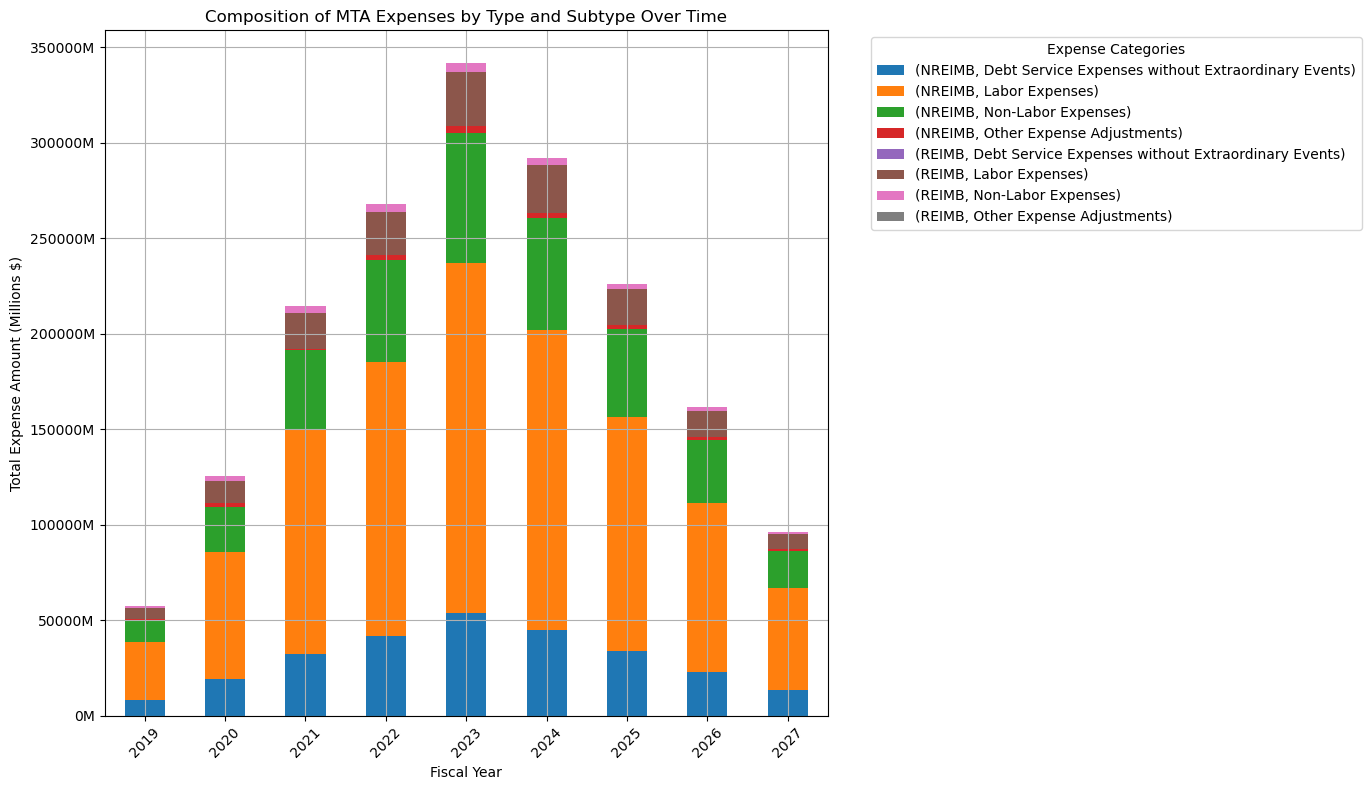

In [27]:
# Visualization
# Creating a stacked bar chart
fig, ax = plt.subplots(figsize=(14, 8))
pivot_data.plot(kind='bar', stacked=True, ax=ax)

# Format the y-axis to display numbers in a more understandable format
scale = 1e6  # Scale by millions
ticks = ticker.FuncFormatter(lambda x, pos: '{0:g}M'.format(x/scale))
ax.yaxis.set_major_formatter(ticks)

plt.title('Composition of MTA Expenses by Type and Subtype Over Time')
plt.xlabel('Fiscal Year')
plt.ylabel('Total Expense Amount (Millions $)')
plt.legend(title='Expense Categories', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.grid(True)

# Show plot
plt.tight_layout() 
plt.show()

## Question 4: Are there any trends in the financial performance of the MTA over the years covered by the data?

In [28]:
results_df.head()

,fiscal_year,month,scenario,financial_plan_year,expense_type,agency,type,subtype,general_ledger,amount,Season
0,2024,2024-04-01,Actual,2024,NREIMB,CD,Total Expenses Before Non-Cash Liability Adjs.,Non-Labor Expenses,Other Business Expenses,3944.81,Spring
1,2024,2024-04-01,Actual,2024,REIMB,MTABC,Total Revenue,NaN,Capital and Other Reimbursements,103737.22,Spring
2,2024,2024-04-01,Actual,2024,REIMB,MNR,Total Expenses Before Non-Cash Liability Adjs.,Labor Expenses,Overtime,1866737.82,Spring
3,2024,2024-04-01,Actual,2024,NREIMB,MTABC,Non-Cash Liabilities,NaN,Environmental Remediation,0.00,Spring
4,2024,2024-04-01,Actual,2024,REIMB,BT,Total Expenses Before Non-Cash Liability Adjs.,Labor Expenses,Health and Welfare,701601.75,Spring


In [29]:
# Print unique 'type' values to verify the categories
print(results_df['type'].unique())

# Calculate total revenue
revenue_df = results_df[results_df['type'] == 'Total Revenue'].groupby('fiscal_year')['amount'].sum()

# Calculate total expenses
expense_categories = ['Total Expenses Before Non-Cash Liability Adjs.', 'Non-Cash Liabilities', 'Debt Service Expenses']
expenses_df = results_df[results_df['type'].isin(expense_categories)].groupby('fiscal_year')['amount'].sum()

# Calculate net income
net_income_df = revenue_df - expenses_df

# Combine into a single DataFrame for plotting
financial_summary = pd.DataFrame({
    'Total Revenue': revenue_df,
    'Total Expense': expenses_df,
    'Net Income': net_income_df
})

print("Financial summary:")
print(financial_summary)

['Total Expenses Before Non-Cash Liability Adjs.', 'Total Revenue', 'Non-Cash Liabilities', 'Debt Service Expenses']
Categories (4, object): ['Debt Service Expenses', 'Non-Cash Liabilities', 'Total Expenses Before Non-Cash Liability Adjs.', 'Total Revenue']
Financial summary:
             Total Revenue  Total Expense    Net Income
fiscal_year                                            
2019          3.422643e+10   6.980169e+10 -3.557526e+10
2020          7.089487e+10   1.536341e+11 -8.273922e+10
2021          1.054048e+11   2.630705e+11 -1.576657e+11
2022          1.444770e+11   3.274726e+11 -1.829956e+11
2023          1.685676e+11   4.178014e+11 -2.492338e+11
2024          1.428932e+11   3.549911e+11 -2.120979e+11
2025          1.071184e+11   2.747482e+11 -1.676298e+11
2026          7.550592e+10   1.953693e+11 -1.198634e+11
2027          4.459127e+10   1.159175e+11 -7.132626e+10


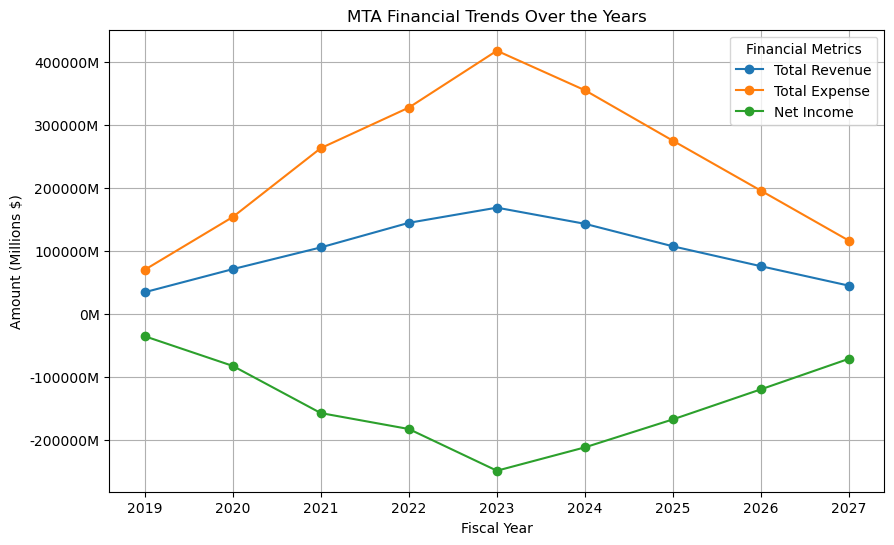

In [30]:
# Check if the DataFrame is not empty before plotting
if not financial_summary.empty:
    fig, ax = plt.subplots(figsize=(10, 6))
    financial_summary.plot(kind='line', marker='o', ax=ax)
    
    # Format the y-axis to display numbers in a more understandable format 
    scale = 1e6  # Scale by millions
    ticks = ticker.FuncFormatter(lambda x, pos: '{0:g}M'.format(x/scale))
    ax.yaxis.set_major_formatter(ticks)

    plt.title('MTA Financial Trends Over the Years')
    plt.xlabel('Fiscal Year')
    plt.ylabel('Amount (Millions $)')
    plt.grid(True)
    plt.legend(title='Financial Metrics')
    plt.show()
else:
    print("No data to display. Check the data processing steps.")

## Question 5: What impact do reimbursable expenses have on the financial health of the MTA?

In [31]:
results_df.head()

,fiscal_year,month,scenario,financial_plan_year,expense_type,agency,type,subtype,general_ledger,amount,Season
0,2024,2024-04-01,Actual,2024,NREIMB,CD,Total Expenses Before Non-Cash Liability Adjs.,Non-Labor Expenses,Other Business Expenses,3944.81,Spring
1,2024,2024-04-01,Actual,2024,REIMB,MTABC,Total Revenue,NaN,Capital and Other Reimbursements,103737.22,Spring
2,2024,2024-04-01,Actual,2024,REIMB,MNR,Total Expenses Before Non-Cash Liability Adjs.,Labor Expenses,Overtime,1866737.82,Spring
3,2024,2024-04-01,Actual,2024,NREIMB,MTABC,Non-Cash Liabilities,NaN,Environmental Remediation,0.00,Spring
4,2024,2024-04-01,Actual,2024,REIMB,BT,Total Expenses Before Non-Cash Liability Adjs.,Labor Expenses,Health and Welfare,701601.75,Spring


In [32]:
# Ensuring that 'amount' is in the correct data type
results_df['amount'] = pd.to_numeric(results_df['amount'], errors='coerce')

# Data Aggregation
# Filter and aggregate reimbursable expenses
reimbursable_df = results_df[results_df['expense_type'] == 'REIMB'].groupby('fiscal_year')['amount'].sum()

# Filter and aggregate non-reimbursable expenses
non_reimbursable_df = results_df[results_df['expense_type'] == 'NREIMB'].groupby('fiscal_year')['amount'].sum()

# Combine into a single DataFrame for plotting
expense_summary = pd.DataFrame({
    'Reimbursable Expenses': reimbursable_df,
    'Non-Reimbursable Expenses': non_reimbursable_df
})

# Calculate totals for comparison (if necessary)
expense_summary['Total Expenses'] = expense_summary['Reimbursable Expenses'] + expense_summary['Non-Reimbursable Expenses']

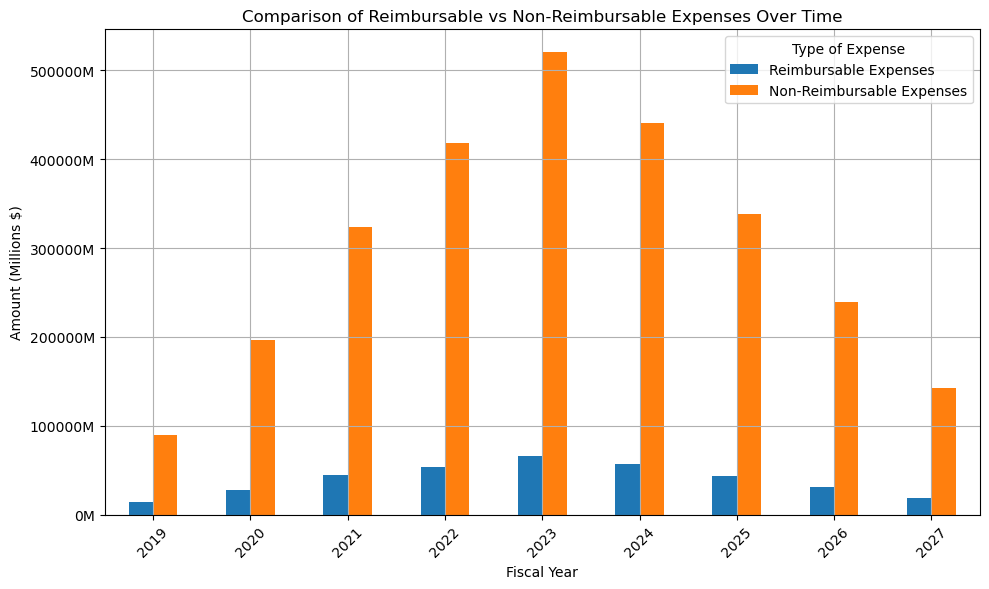

In [33]:
# Visualization
# Create a comparative bar chart
fig, ax = plt.subplots(figsize=(10, 6))
expense_summary[['Reimbursable Expenses', 'Non-Reimbursable Expenses']].plot(kind='bar', stacked=False, ax=ax)

# Format the y-axis to display numbers in a more understandable format (e.g., Millions)
scale = 1e6  # Scale by millions
ticks = ticker.FuncFormatter(lambda x, pos: '{0:g}M'.format(x/scale))
ax.yaxis.set_major_formatter(ticks)

plt.title('Comparison of Reimbursable vs Non-Reimbursable Expenses Over Time')
plt.xlabel('Fiscal Year')
plt.ylabel('Amount (Millions $)')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='Type of Expense')
plt.tight_layout()
plt.show()

## Question 6: What is the impact of seasonal variations on MTA revenues and expenses?

In [34]:
results_df.head()

,fiscal_year,month,scenario,financial_plan_year,expense_type,agency,type,subtype,general_ledger,amount,Season
0,2024,2024-04-01,Actual,2024,NREIMB,CD,Total Expenses Before Non-Cash Liability Adjs.,Non-Labor Expenses,Other Business Expenses,3944.81,Spring
1,2024,2024-04-01,Actual,2024,REIMB,MTABC,Total Revenue,NaN,Capital and Other Reimbursements,103737.22,Spring
2,2024,2024-04-01,Actual,2024,REIMB,MNR,Total Expenses Before Non-Cash Liability Adjs.,Labor Expenses,Overtime,1866737.82,Spring
3,2024,2024-04-01,Actual,2024,NREIMB,MTABC,Non-Cash Liabilities,NaN,Environmental Remediation,0.00,Spring
4,2024,2024-04-01,Actual,2024,REIMB,BT,Total Expenses Before Non-Cash Liability Adjs.,Labor Expenses,Health and Welfare,701601.75,Spring


In [35]:
# Data Aggregation
# Filter data by type for revenues and expenses and group by season
seasonal_revenue = results_df[results_df['type'] == 'Total Revenue'].groupby('Season')['amount'].sum()
seasonal_expense = results_df[results_df['type'].str.contains('Expense')].groupby('Season')['amount'].sum()

# Combine revenues and expenses into a single DataFrame
seasonal_financials = pd.DataFrame({
    'Revenue': seasonal_revenue,
    'Expense': seasonal_expense
})
print(seasonal_financials)
# Calculate net income by season
seasonal_financials['Net Income'] = seasonal_financials['Revenue'] - seasonal_financials['Expense']

             Revenue       Expense
Season                            
Fall    1.111911e+11  2.530728e+11
Spring  1.093136e+11  2.346511e+11
Summer  1.188263e+11  2.541836e+11
Winter  5.543484e+11  1.041884e+12


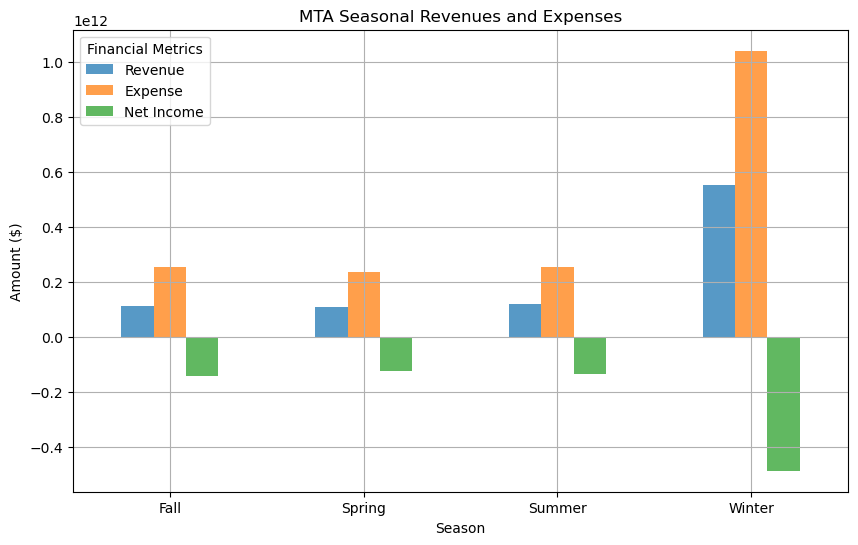

In [36]:
# Visualization
seasonal_financials.plot(kind='bar', figsize=(10, 6), alpha=0.75, rot=0)
plt.title('MTA Seasonal Revenues and Expenses')
plt.xlabel('Season')
plt.ylabel('Amount ($)')
plt.grid(True)
plt.legend(title='Financial Metrics')
plt.show()